Event Driven Simulation 

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Scheduling CoMP
---------

In [5]:
import eds
import simpy
import numpy as np
import pandas as pd
SCHEDULE_T=2
import matplotlib.pyplot as plt

In [92]:
env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
ue_list2=np.array([])
#define UEs

    
max_prb=50
thr=6
cluster=[19,20]

ue_nr=50

x=np.append(np.ones(ue_nr)*19,np.ones(ue_nr)*20)
y=np.append(np.ones(ue_nr)*20,np.ones(ue_nr)*19)
sinr=np.random.randint(0,12,ue_nr*2)
sinr2=np.random.randint(2,16,ue_nr*2)
rt_nrt=np.array([])
rt_nrt=np.append(rt_nrt,np.ones(ue_nr*2)*0)

df=pd.DataFrame()
df['PCI Serving']=x
df['PCI Coord']=y
df['JT_1 SINR [lin]']=sinr
df['JT_2 SINR [lin]']=sinr2
df['usage']=rt_nrt
df['id']=np.arange(0,ue_nr*2)
   
df['PCI Serving']=df['PCI Serving'].astype('int')
df['PCI Coord']=df['PCI Coord'].astype('int')

df['JT_1 SINR [lin]']=df['JT_1 SINR [lin]'].astype('int')
df['JT_2 SINR [lin]']=df['JT_2 SINR [lin]'].astype('int')

In [93]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env))

        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr-1)]
    env.process(eds.scheduler(env,ue_list,SCHEDULE_T,[19,20],prb_number_normal,ue_19,ue_nr,1))
env.run(until=5)

empty queue
ue-number sched1: 0
160.0
1
empty queue
empty queue
ue-number sched1: 0
160.0
1
empty queue
empty queue
empty queue
empty queue
ue-number sched1: 0
53.33333333333333
3
empty queue
empty queue
empty queue


C:\Users\Caroline Zoll\EDS\eds.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


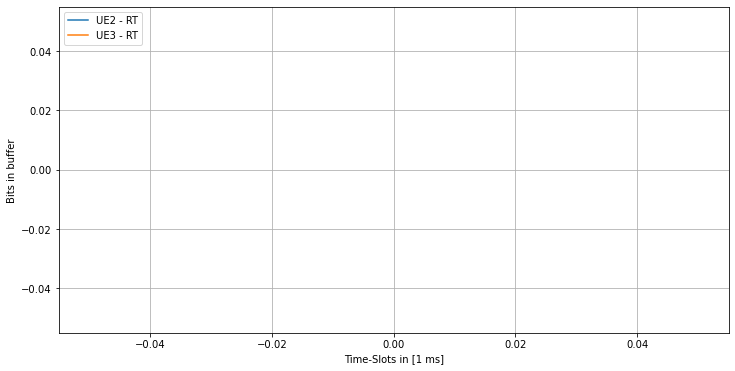

In [94]:

plt.figure(figsize=(12,6))
#plt.plot(list(ue_list[stream].mon.keys())[1000:3000],list(ue_list[stream].mon.values())[1000:3000],label='UE1 - streamer')
plt.plot(list(ue_all[0].mon.keys())[1000:3000],list(ue_all[0].mon.values())[1000:3000],label='UE2 - RT')
plt.plot(list(ue_all[45].mon.keys())[1000:3000],list(ue_all[45].mon.values())[1000:3000],label='UE3 - RT')
#plt.plot(list(ue_list[120].mon.keys())[1000:3000],list(ue_list[120].mon.values())[1000:3000],label='UE4')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

In [88]:
def ue_to_df(users):
    df=pd.DataFrame()
    mr=[]
    mr2=[]
    queue=[]
    queue2=[]
    tbs=[]
    tbs2=[]
    comp=[]
    sinr=[]
    sinr2=[]
    gain=[]
    qos=[]
    for i in users:
        mr.append(i.mR)
        mr2.append(i.mR2)
        queue.append(i.queue.level)
        queue2.append(i.queue2.level)
        tbs.append(i.tbs)
        tbs2.append(i.tbs2)
        comp.append(i.comp)
        sinr.append(i.sinr)
        sinr2.append(i.sinr2)
        gain.append(i.gain)
        qos.append(i.qos)
    
    print(len(mr))
    df['mr']=mr
    df['mr2']=mr2
    df['queue']=queue
    df['queue2']=queue2
    df['tbs']=tbs
    df['tbs2']=tbs2
    df['comp']=comp
    df['sinr1']=sinr
    df['sinr2']=sinr2
    df['sinr-gain']=gain
    df['qos']=qos
    return df

In [90]:
df=ue_to_df(ue_all[0:ue_nr])
df[df['comp']==1]

50


,mr,mr2,queue,queue2,tbs,tbs2,comp,sinr1,sinr2,sinr-gain,qos
1,4.002439,2.515979,23840,0.0,26.0,180.00,1,2.0,15.0,13.0,0.0
6,0.100000,2.493137,24000,0.0,55.0,142.50,1,6.0,13.0,7.0,0.0
10,0.100000,2.671176,24000,0.0,10.0,142.50,1,0.0,13.0,13.0,0.0
20,0.100000,2.615617,24000,0.0,34.0,100.00,1,3.0,10.0,7.0,0.0
21,0.100000,2.651589,24000,0.0,10.0,77.50,1,0.0,8.0,8.0,0.0
22,0.100000,2.563851,24000,0.0,55.0,142.50,1,6.0,13.0,7.0,0.0
23,0.100000,2.627716,24000,0.0,10.0,105.00,1,0.0,11.0,11.0,0.0
28,0.100000,2.574397,24000,0.0,18.0,105.00,1,1.0,11.0,10.0,0.0
35,0.100000,2.661416,24000,0.0,34.0,161.25,1,3.0,14.0,11.0,0.0
43,160.100000,2.469207,23840,0.0,10.0,105.00,1,0.0,11.0,11.0,0.0


In [80]:
C=0
nC=0
for i in ue_all:
    print('C:', i.mR)
    print('nC:',i.mR2)
    print('C-queue:', i.queue.level)
    print('nC-queue:',i.queue2.level)
    print('nC-queue:',i.qos)
    nC=nC+i.mR2
    C=C+i.mR

C: 9.92669301173932
nC: 4.799966200639988
C-queue: 0
nC-queue: 0
nC-queue: 1.0
C: 10.946054051824346
nC: 4.799055498157317
C-queue: 0
nC-queue: 0
nC-queue: 1.0
C: 17.98780669223334
nC: 2.490796249677299
C-queue: 23040
nC-queue: 0
nC-queue: 1.0
C: 10.314315250305196
nC: 4.7996711144864985
C-queue: 0
nC-queue: 0
nC-queue: 1.0
C: 10.975313641580364
nC: 4.799021186133024
C-queue: 0
nC-queue: 0
nC-queue: 1.0
C: 14.45120038193433
nC: 4.765932004629105
C-queue: 0
nC-queue: 0
nC-queue: 1.0
C: 10.946054051824346
nC: 4.799695785304936
C-queue: 0
nC-queue: 0.0
nC-queue: 1.0
C: 0.1
nC: 2.6456595331281925
C-queue: 24000
nC-queue: 0
nC-queue: 1.0
C: 0.1
nC: 2.5638511069942855
C-queue: 24000
nC-queue: 0
nC-queue: 1.0
C: 0.1
nC: 2.6013530947189376
C-queue: 24000
nC-queue: 0
nC-queue: 1.0
C: 0.1
nC: 2.555334902426082
C-queue: 24000
nC-queue: 0
nC-queue: 1.0
C: 10.389171926047338
nC: 4.7996081964737805
C-queue: 0
nC-queue: 0
nC-queue: 1.0
C: 0.1
nC: 2.574397330485495
C-queue: 24000
nC-queue: 0
nC-queue:

In [69]:
mean_tbs=0
for i in ue_all:
    mean_tbs+=i.tbs
    
mean_tbs=mean_tbs/len(ue_all)

mean_tbs2=0
ue_list=ue_dict[19]
for i in ue_list:
    mean_tbs2+=i.tbs
ue_list=ue_dict[20]
for i in ue_list:
    mean_tbs2+=i.tbs
    
mean_tbs2=mean_tbs2/(len(ue_dict[19])+len(ue_dict[20]))

In [70]:
print('all:',mean_tbs)
print('no comp:',mean_tbs2)

all: 58.31964285714286
no comp: 66.11238532110092


In [86]:
ue_all_19=ue_all[0:69]
av=0
for i in ue_all_19:
    av+=i.mR2/i.mR
    print(i.mR2)
    print(i.mR)
av=av/70

0.1
10.015402084106272
0.1
11.662784463851361
0.0
1.6841584158415843
0.1
10.03065035669059
0.0
0.1
0.1
11.450533659224037
0.0
28.287169129186193
0.1
10.733918701996283
0.1
10.370110957654854
0.0
0.1
0.0
0.1
0.1
9.912346479506974
0.1
11.100283633218199
0.0
8.50459258194585
0.1
11.726095284828034
0.1
10.594632965865843
0.0
2.5570658226364222
0.1
10.157963082388946
0.1
10.061570555739449
0.1
12.340479616304965
0.1
9.870009237664279
0.0
6.7687067934967935
0.1
10.408476289141023
0.0
2.2285405929254214
0.1
10.80939127792115
0.1
9.710205598634735
0.1
11.361199291734433
0.1
10.685892431109721
0.1
10.225557852262536
0.1
12.572315161345323
0.1
11.168406910122863
0.1
9.955751468993439
0.1
10.157963082388946
0.1
12.061608879876555
0.1
12.572315161345323
0.1
10.208389939333795
0.0
12.232156684786549
0.1
10.594632965865843
0.1
11.067737160546367
0.1
10.191404597685452
0.1
10.061570555739449
0.1
11.959868014135772
0.1
10.314315250305196
0.0
25.22388070112831
0.1
10.109059080364956
0.1
11.319537911416

In [87]:
av

0.007007875288698269

In [83]:
print('comp prb perc',prb_number_comp/(prb_number_normal+prb_number_comp))
print('comp user perc',len(ue_comp)/len(ue_all))

comp prb perc 0.24
comp user perc 0.2
